In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [2]:
agg_data = pd.read_csv('aggregated.csv')
agg_no_test = agg_data[agg_data['_golden'] == False]
full_data = pd.read_csv('full_report.csv')
#full_data['_golden']

### Confidence

#### With Test Questions

In [23]:
agg_data[['assigned_class:confidence']].describe()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,assigned_class,assigned_class:confidence,assigned_class_gold,label,new_sentence,sentence
0,1445637774,False,finalized,3,11/10/2017 13:41:19,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, too) undoubtedly influenced people's votes when it","OBJECT_A, and OBJECT_B, too) undoubtedly influenced people's votes when it"
1,1445637775,False,finalized,4,11/10/2017 13:43:53,NO_COMP,1.0000,NaN,NO_COMP,"I'd go with <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span> or <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>.",I'd go with OBJECT_A or OBJECT_B.
2,1445637776,False,finalized,3,11/10/2017 13:45:29,NO_COMP,1.0000,NaN,NO_COMP,"This is potentially useful for <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, PHP, JS and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>.","This is potentially useful for OBJECT_A, PHP, JS and OBJECT_B."
3,1445637777,False,finalized,3,11/10/2017 13:44:29,NO_COMP,0.6562,NaN,NO_COMP,"And your other server languages like <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, PHP, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, etc.","And your other server languages like OBJECT_A, PHP, OBJECT_B, etc."
4,1445637778,False,finalized,3,11/10/2017 13:42:11,NO_COMP,0.6916,NaN,NO_COMP,"Java learned a lot from <span style=""color: #9A14B2; font-weight: bold"">ruby:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">python:[OBJECT_B]</span> and even C#.","Java learned a lot from OBJECT_A, OBJECT_B and even C#."
5,1445637779,False,finalized,3,11/10/2017 13:44:25,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>/<span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>/Groovy/Perl is:",OBJECT_A/OBJECT_B/Groovy/Perl is:
6,1445637780,False,finalized,3,11/10/2017 13:42:48,NO_COMP,1.0000,NaN,NO_COMP,"Java, <span style=""color: #9A14B2; font-weight: bold"">ruby:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">python:[OBJECT_B]</span>, Perl, also all work.","Java, OBJECT_A, OBJECT_B, Perl, also all work."
7,1445637781,False,finalized,3,11/10/2017 13:43:47,NO_COMP,1.0000,NaN,NO_COMP,"highlighting mzscheme, perl, <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span> by default.","highlighting mzscheme, perl, OBJECT_A, and OBJECT_B by default."
8,1445637782,False,finalized,4,11/10/2017 13:46:52,NO_COMP,1.0000,NaN,NO_COMP,"Highly skilled in Perl, PHP, <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span> programming languages.","Highly skilled in Perl, PHP, OBJECT_A, OBJECT_B programming languages."
9,1445637783,False,finalized,3,11/10/2017 13:44:29,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, java, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, php, javascript","OBJECT_A, java, OBJECT_B, php, javascript"


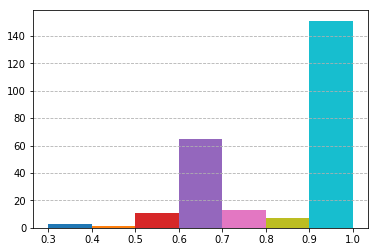

In [4]:
color_map = plt.cm.get_cmap('tab10')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    agg_data['assigned_class:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

#### Without Test Questions

In [5]:
agg_no_test[['assigned_class:confidence']].describe()

,assigned_class:confidence
count,200.000000
mean,0.868112
std,0.177531
min,0.355400
25%,0.676650
50%,1.000000
75%,1.000000
max,1.000000


In [25]:
import re
from collections import defaultdict
d = defaultdict(int)
exp = r'\w+(?=:\[OBJECT_[AB]\])'
s = set()
for i, row in agg_data.iterrows():
    a = (sorted(re.findall(exp, row['new_sentence'])))
    d['{}-{}'.format(a[0],a[1])] += 1
d

defaultdict(int,
            {'android-iphone': 104,
             'baseball-football': 4,
             'beef-chicken': 6,
             'beer-wine': 4,
             'bicycle-car': 4,
             'bmw-mercedes': 7,
             'cat-dog': 4,
             'europe-usa': 6,
             'python-ruby': 109,
             'summer-winter': 3})

#### Least confident sentences

In [6]:
color_map = sns.light_palette('blue', as_cmap=True)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.expand_frame_repr', True)
print('Least confident sentences (confidence <= 0.6)')
lc = agg_data[['_unit_id', 'assigned_class:confidence', 'assigned_class']]
lc = lc.sort_values('assigned_class:confidence')
lc = (lc[lc['assigned_class:confidence'] <= 0.6])
lc

Least confident sentences (confidence <= 0.6)


,_unit_id,assigned_class:confidence,assigned_class
168,1445637954,0.3554,WORSE
67,1445637841,0.3573,NO_COMP
149,1445637935,0.3700,BETTER
213,1446784090,0.4967,WORSE
174,1445637960,0.5001,UNCLEAR
54,1445637828,0.5024,UNCLEAR
162,1445637948,0.5042,NO_COMP
45,1445637819,0.5045,WORSE
219,1446786999,0.5058,UNCLEAR
226,1446789585,0.5212,WORSE


In [7]:
sentences = full_data[full_data['_unit_id'].isin(lc['_unit_id'].tolist())]
sentences_p = sentences[['_golden', '_unit_id','assigned_class', '_trust', 'new_sentence']]
#sentences_p.style.background_gradient(cmap=color_map,subset=['_trust'])

In [134]:
merged = pd.merge(lc, sentences_p, on=['_unit_id'], how='inner', suffixes=['_l', '_r'])
merged.rename(columns={'assigned_class_l' : 'winning_class', 'assigned_class_r':'proposed'}, inplace=True)

#subset = merged[['proposed', 'new_sentence']]

result = merged[['assigned_class:confidence', '_golden','winning_class', 'proposed', '_trust', 'new_sentence']]
result = result[result['_golden'] == False]

#result = pd.merge(result, subset, on='new_sentence')
#pd.merge(subset,subset, on='new_sentence', suffixes=['_a', '_b'], how='inner')
#result.groupby(by=['new_sentence', '_golden']).proposed.describe()
result.style.background_gradient(cmap=color_map,subset=['assigned_class:confidence'])

,assigned_class:confidence,_golden,winning_class,proposed,_trust,new_sentence
0,0.3554,False,WORSE,BETTER,0.7273,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
1,0.3554,False,WORSE,WORSE,0.8571,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
2,0.3554,False,WORSE,NO_COMP,0.8276,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
3,0.3573,False,NO_COMP,NO_COMP,0.9091,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
4,0.3573,False,NO_COMP,BETTER,0.8571,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
5,0.3573,False,NO_COMP,UNCLEAR,0.7778,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
6,0.37,False,BETTER,NO_COMP,0.8276,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
7,0.37,False,BETTER,BETTER,1,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
8,0.37,False,BETTER,UNCLEAR,0.875,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
19,0.5001,False,UNCLEAR,WORSE,0.7273,"Overall, this is a great phone and definitely better than the iphone:[OBJECT_A] 5 because of its speed, screen size, screen quality, hardware, and android:[OBJECT_B] 4.0.4"


### Labels

#### Distribution

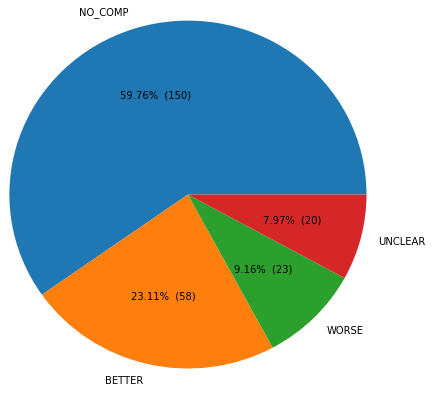

In [26]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


labels = agg_data['label']
plt.figure(figsize=plt.figaspect(1))
plt.pie(
    labels.value_counts().values,
    labels=labels.value_counts().keys().tolist(),
    radius=2,
    autopct=make_autopct(labels.value_counts().values))
plt.show()
